In [35]:
import pandas as p
from math import ceil
import seaborn as sns
import statsmodels.formula.api as smf

# allow plots to appear directly in the notebook
%matplotlib inline

In [36]:
df = p.read_csv('Data/train_v2.csv')

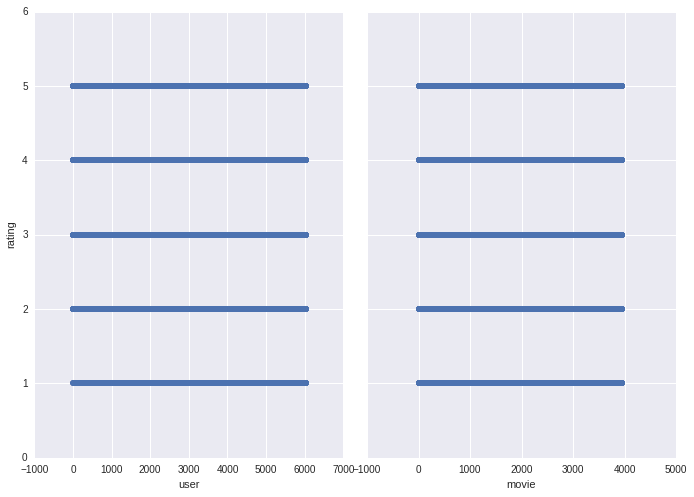

In [37]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['user','movie'], y_vars='rating', size=7, aspect=0.7)

In [38]:
# Trying Multiple Linear Regression
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='rating ~ movie + user', data=df).fit()

# print the coefficients
# lm1.params

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1612.
Date:                Sun, 27 Mar 2016   Prob (F-statistic):               0.00
Time:                        04:24:35   Log-Likelihood:            -1.1455e+06
No. Observations:              750156   AIC:                         2.291e+06
Df Residuals:                  750153   BIC:                         2.291e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.6822      0.003   1076.552      0.000         3.676     3.689
movie      -6.553e-05   1.17e-06    -55.791      0.000     -6.78e-05 -6.32e-05
user         7.13e-06   7.44e-07      9.578      0.000      5.67e-06  8.59e-06
==============================================================================
Omnibus:                    39292.771   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42369.568
Skew:                          -0.556   Prob(JB):                         0.00
Kurtosis:                       2.657   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Testing
df = p.read_csv('Data/test_v2.csv')
values = [['ID', 'rating']]
for index, row in df.iterrows():
    rating = lm1.params.Intercept + lm1.params.user*row['user'] + lm1.params.movie*row['movie']
    values += [[row['ID'], rating]]

In [40]:
df = p.DataFrame(values)
with open('Data/Regression-results.csv', 'w') as f:
    f.write(df.to_csv(index=False, header=False))